In [46]:
# Basic Libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time 
import random
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() # set the default Seaborn style for graphics

In [47]:
AMD_data = pd.read_csv('AMD_cleaned.csv')
AMD_data.head()

,Unnamed: 0,Manufacturer,Foundry,Architecture,Arbitrary Gen,Gen Year,FP32 (float) in GFLOPS,Memory Size (MB),Memory Type,Bus Width (bits),...,Memory clock (MHz),Process Size (nm),Transistors (millions),Density (M/mm²),Die Size (mm²),Max. TDP (W),Pixel Rate (GPixel/s),Texture Rate (GTexel/s),L2 Cache (KB),Shading Units
0,0,AMD,TSMC,TeraScale 2,1,2009,104.0,512.0,DDR2,64,...,667.0,40.0,292.0,4.9,59.0,19.0,2.6,5.2,128.0,80
1,1,AMD,TSMC,TeraScale 2,1,2009,104.0,512.0,GDDR3,64,...,500.0,40.0,292.0,4.9,59.0,25.0,2.6,5.2,128.0,80
2,2,AMD,TSMC,TeraScale 2,1,2009,104.0,1024.0,GDDR3,64,...,800.0,40.0,292.0,4.9,59.0,25.0,2.6,5.2,128.0,80
3,3,AMD,TSMC,TeraScale 2,1,2009,104.0,512.0,GDDR3,64,...,500.0,40.0,292.0,4.9,59.0,25.0,2.6,5.2,128.0,80
4,4,AMD,TSMC,TeraScale 2,1,2009,352.0,1024.0,DDR2,128,...,500.0,40.0,627.0,6.0,104.0,39.0,4.4,8.8,256.0,400


In [48]:
Nvidia_data = pd.read_csv('Nvidia_cleaned.csv')
Nvidia_data.head()

,Unnamed: 0,Manufacturer,Foundry,Architecture,Arbitrary Gen,Gen Year,FP32 (float) in GFLOPS,Memory Size (MB),Memory Type,Bus Width (bits),...,Memory clock (MHz),Process Size (nm),Transistors (millions),Density (M/mm²),Die Size (mm²),Max. TDP (W),Pixel Rate (GPixel/s),Texture Rate (GTexel/s),L2 Cache (KB),Shading Units
0,0,Nvidia,UMC,Tesla,1,2006,20.8,256.0,DDR2,64,...,400.0,65.0,210.0,2.4,86.0,40.0,2.160,2.16,16.0,8
1,1,Nvidia,TSMC,Tesla,1,2006,117.5,512.0,DDR2,128,...,504.0,55.0,314.0,2.6,121.0,50.0,5.904,11.81,32.0,32
2,2,Nvidia,TSMC,Tesla,1,2006,89.6,512.0,GDDR3,128,...,800.0,55.0,314.0,2.6,121.0,50.0,4.400,8.80,32.0,32
3,3,Nvidia,TSMC,Tesla,1,2006,120.0,512.0,DDR2,192,...,500.0,55.0,505.0,2.6,196.0,105.0,6.000,12.00,64.0,64
4,4,Nvidia,TSMC,Tesla,1,2006,144.0,512.0,GDDR3,192,...,792.0,55.0,505.0,2.6,196.0,105.0,7.200,14.40,64.0,64


In [49]:
Nvidia_data.drop(columns = ['Unnamed: 0'])

,Manufacturer,Foundry,Architecture,Arbitrary Gen,Gen Year,FP32 (float) in GFLOPS,Memory Size (MB),Memory Type,Bus Width (bits),GPU clock (MHz),Memory clock (MHz),Process Size (nm),Transistors (millions),Density (M/mm²),Die Size (mm²),Max. TDP (W),Pixel Rate (GPixel/s),Texture Rate (GTexel/s),L2 Cache (KB),Shading Units
0,Nvidia,UMC,Tesla,1,2006,20.8,256.0,DDR2,64,540.0,400.0,65.0,210.0,2.4,86.0,40.0,2.160,2.16,16.0,8
1,Nvidia,TSMC,Tesla,1,2006,117.5,512.0,DDR2,128,738.0,504.0,55.0,314.0,2.6,121.0,50.0,5.904,11.81,32.0,32
2,Nvidia,TSMC,Tesla,1,2006,89.6,512.0,GDDR3,128,550.0,800.0,55.0,314.0,2.6,121.0,50.0,4.400,8.80,32.0,32
3,Nvidia,TSMC,Tesla,1,2006,120.0,512.0,DDR2,192,500.0,500.0,55.0,505.0,2.6,196.0,105.0,6.000,12.00,64.0,64
4,Nvidia,TSMC,Tesla,1,2006,144.0,512.0,GDDR3,192,600.0,792.0,55.0,505.0,2.6,196.0,105.0,7.200,14.40,64.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Nvidia,TSMC,Ada Lovelace,13,2022,67580.0,20480.0,GDDR6X,320,2100.0,1325.0,5.0,76300.0,125.3,609.0,800.0,345.600,1056.00,98304.0,18432
275,Nvidia,TSMC,Ada Lovelace,13,2022,73540.0,24576.0,GDDR6X,384,2280.0,1313.0,5.0,76300.0,125.3,609.0,800.0,443.500,1149.00,98304.0,18432
276,Nvidia,TSMC,Ada Lovelace,13,2022,82580.0,24576.0,GDDR6X,384,2235.0,1313.0,5.0,76300.0,125.3,609.0,800.0,443.500,1290.00,98304.0,18432
277,Nvidia,TSMC,Ada Lovelace,13,2022,93240.0,24576.0,GDDR6X,384,2325.0,1500.0,5.0,76300.0,125.3,609.0,800.0,492.500,1457.00,98304.0,18432


In [50]:
AMD_data.drop(columns = ['Unnamed: 0'])

,Manufacturer,Foundry,Architecture,Arbitrary Gen,Gen Year,FP32 (float) in GFLOPS,Memory Size (MB),Memory Type,Bus Width (bits),GPU clock (MHz),Memory clock (MHz),Process Size (nm),Transistors (millions),Density (M/mm²),Die Size (mm²),Max. TDP (W),Pixel Rate (GPixel/s),Texture Rate (GTexel/s),L2 Cache (KB),Shading Units
0,AMD,TSMC,TeraScale 2,1,2009,104.0,512.0,DDR2,64,650.0,667.0,40.0,292.0,4.9,59.0,19.0,2.60,5.2,128.0,80
1,AMD,TSMC,TeraScale 2,1,2009,104.0,512.0,GDDR3,64,650.0,500.0,40.0,292.0,4.9,59.0,25.0,2.60,5.2,128.0,80
2,AMD,TSMC,TeraScale 2,1,2009,104.0,1024.0,GDDR3,64,650.0,800.0,40.0,292.0,4.9,59.0,25.0,2.60,5.2,128.0,80
3,AMD,TSMC,TeraScale 2,1,2009,104.0,512.0,GDDR3,64,650.0,500.0,40.0,292.0,4.9,59.0,25.0,2.60,5.2,128.0,80
4,AMD,TSMC,TeraScale 2,1,2009,352.0,1024.0,DDR2,128,550.0,500.0,40.0,627.0,6.0,104.0,39.0,4.40,8.8,256.0,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,AMD,GlobalFoundries,GCN 5.0,7,2017,10540.0,8192.0,HBM2,2048,1156.0,800.0,14.0,12500.0,25.3,495.0,375.0,94.14,329.5,4096.0,4096
214,AMD,GlobalFoundries,GCN 5.0,7,2017,12660.0,8192.0,HBM2,2048,1247.0,800.0,14.0,12500.0,25.3,495.0,375.0,98.94,395.8,4096.0,4096
215,AMD,GlobalFoundries,GCN 5.0,7,2017,12660.0,8192.0,HBM2,2048,1247.0,945.0,14.0,12500.0,25.3,495.0,375.0,98.94,395.8,4096.0,4096
216,AMD,GlobalFoundries,GCN 5.0,7,2017,12660.0,8192.0,HBM2,2048,1247.0,945.0,14.0,12500.0,25.3,495.0,375.0,98.94,395.8,4096.0,4096


In [51]:
frames = [AMD_data, Nvidia_data]
combined_data = pd.concat(frames)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 0 to 278
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               497 non-null    int64  
 1   Manufacturer             497 non-null    object 
 2   Foundry                  497 non-null    object 
 3   Architecture             497 non-null    object 
 4   Arbitrary Gen            497 non-null    int64  
 5   Gen Year                 497 non-null    int64  
 6   FP32 (float) in GFLOPS   497 non-null    float64
 7   Memory Size (MB)         497 non-null    float64
 8   Memory Type              497 non-null    object 
 9   Bus Width (bits)         497 non-null    int64  
 10  GPU clock (MHz)          497 non-null    float64
 11  Memory clock (MHz)       497 non-null    float64
 12  Process Size (nm)        497 non-null    float64
 13  Transistors (millions)   497 non-null    float64
 14  Density (M/mm²)          497 no

In [52]:
combined_data = combined_data.dropna(subset=['Max. TDP (W)'])
combined_data = combined_data.drop(columns = ['Unnamed: 0', 'Arbitrary Gen'])
#dropping Arbitrary Gen as both manufacturers have different architectures
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496 entries, 0 to 278
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Manufacturer             496 non-null    object 
 1   Foundry                  496 non-null    object 
 2   Architecture             496 non-null    object 
 3   Gen Year                 496 non-null    int64  
 4   FP32 (float) in GFLOPS   496 non-null    float64
 5   Memory Size (MB)         496 non-null    float64
 6   Memory Type              496 non-null    object 
 7   Bus Width (bits)         496 non-null    int64  
 8   GPU clock (MHz)          496 non-null    float64
 9   Memory clock (MHz)       496 non-null    float64
 10  Process Size (nm)        496 non-null    float64
 11  Transistors (millions)   496 non-null    float64
 12  Density (M/mm²)          496 non-null    float64
 13  Die Size (mm²)           496 non-null    float64
 14  Max. TDP (W)             496 no

## Exploratory Data Analysis

In [53]:
combined_data.describe()

,Gen Year,FP32 (float) in GFLOPS,Memory Size (MB),Bus Width (bits),GPU clock (MHz),Memory clock (MHz),Process Size (nm),Transistors (millions),Density (M/mm²),Die Size (mm²),Max. TDP (W),Pixel Rate (GPixel/s),Texture Rate (GTexel/s),L2 Cache (KB),Shading Units
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,2013.141129,6236.322319,4310.967742,270.129032,1042.449597,1259.096774,27.403226,6879.590726,21.179032,263.891129,212.852823,54.759673,140.464528,3564.225806,1846.403226
std,4.413048,12949.432566,5471.245642,492.842196,430.844345,478.197570,14.304577,11922.796974,26.470218,169.510240,187.870083,88.945593,214.521901,12611.472534,2680.515970
min,2006.000000,20.800000,128.000000,32.000000,475.000000,333.000000,5.000000,210.000000,2.100000,56.000000,19.000000,1.046000,2.160000,16.000000,8.000000
25%,2010.000000,599.000000,1024.000000,128.000000,730.000000,900.000000,14.000000,950.000000,5.900000,118.000000,75.000000,6.400000,19.380000,256.000000,384.000000
50%,2012.000000,1613.000000,2048.000000,192.000000,925.000000,1200.000000,28.000000,2800.000000,12.300000,232.000000,170.000000,20.640000,52.435000,512.000000,960.000000
75%,2016.000000,5345.000000,6144.000000,256.000000,1257.000000,1502.000000,40.000000,6600.000000,24.400000,365.250000,290.000000,64.000000,170.725000,2048.000000,2304.000000
max,2022.000000,93240.000000,49152.000000,4096.000000,2505.000000,3000.000000,65.000000,76300.000000,125.300000,815.000000,900.000000,691.000000,1457.000000,98304.000000,18432.000000


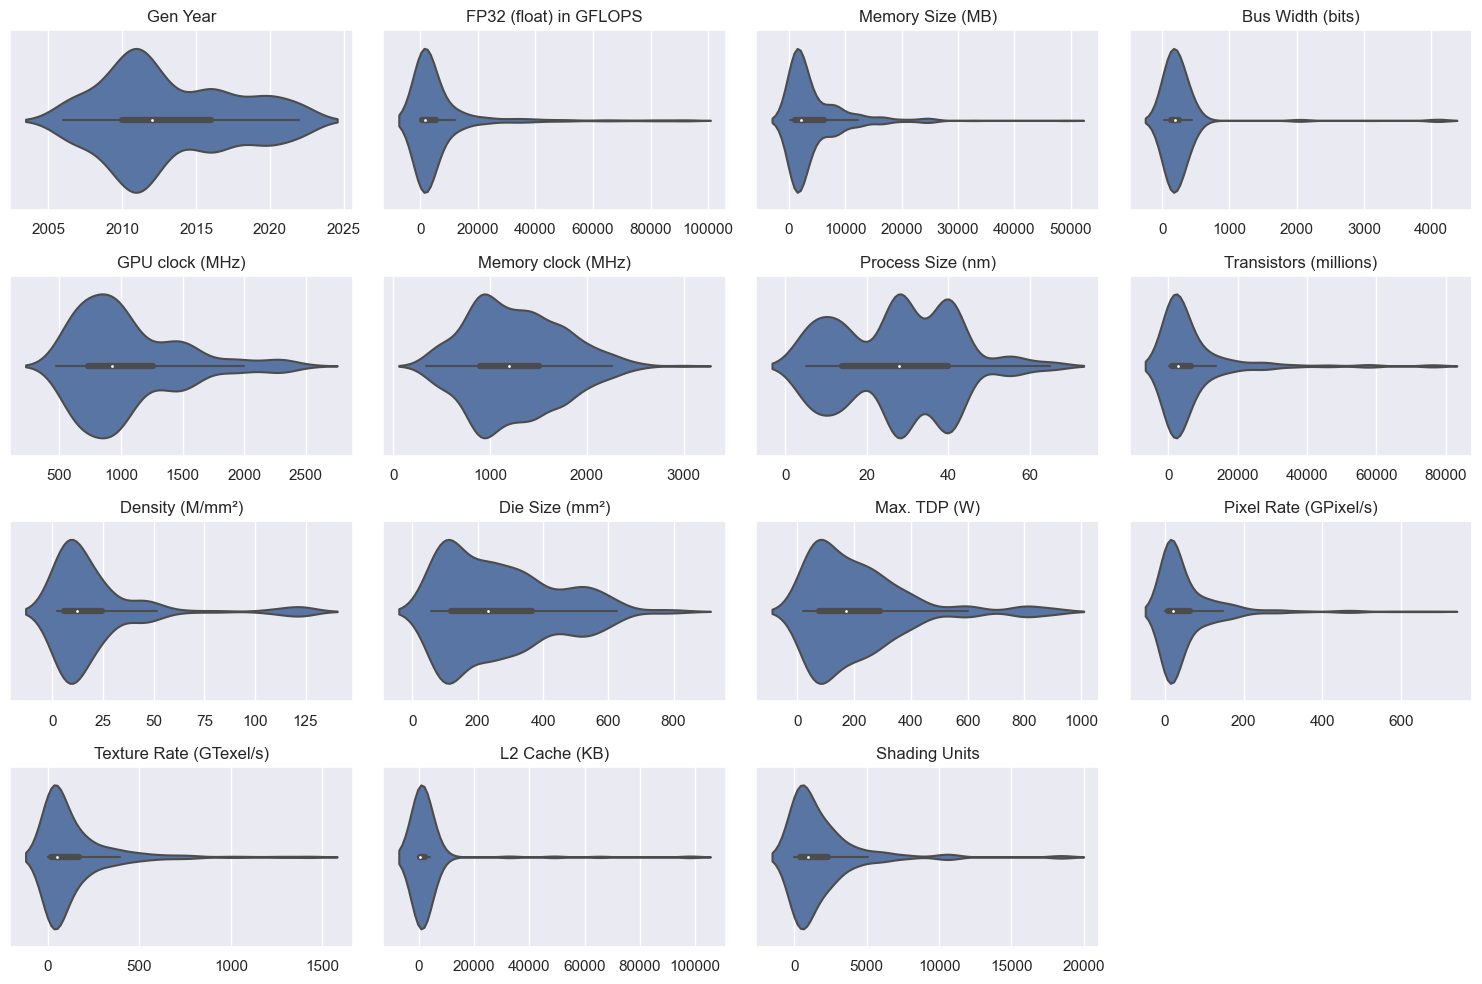

In [61]:
# Identify numerical columns
numerical_cols = combined_data.select_dtypes(include='number').columns

# Plot violin plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 4 + 1, 4, i + 1)
    sb.violinplot(x=combined_data[col])
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

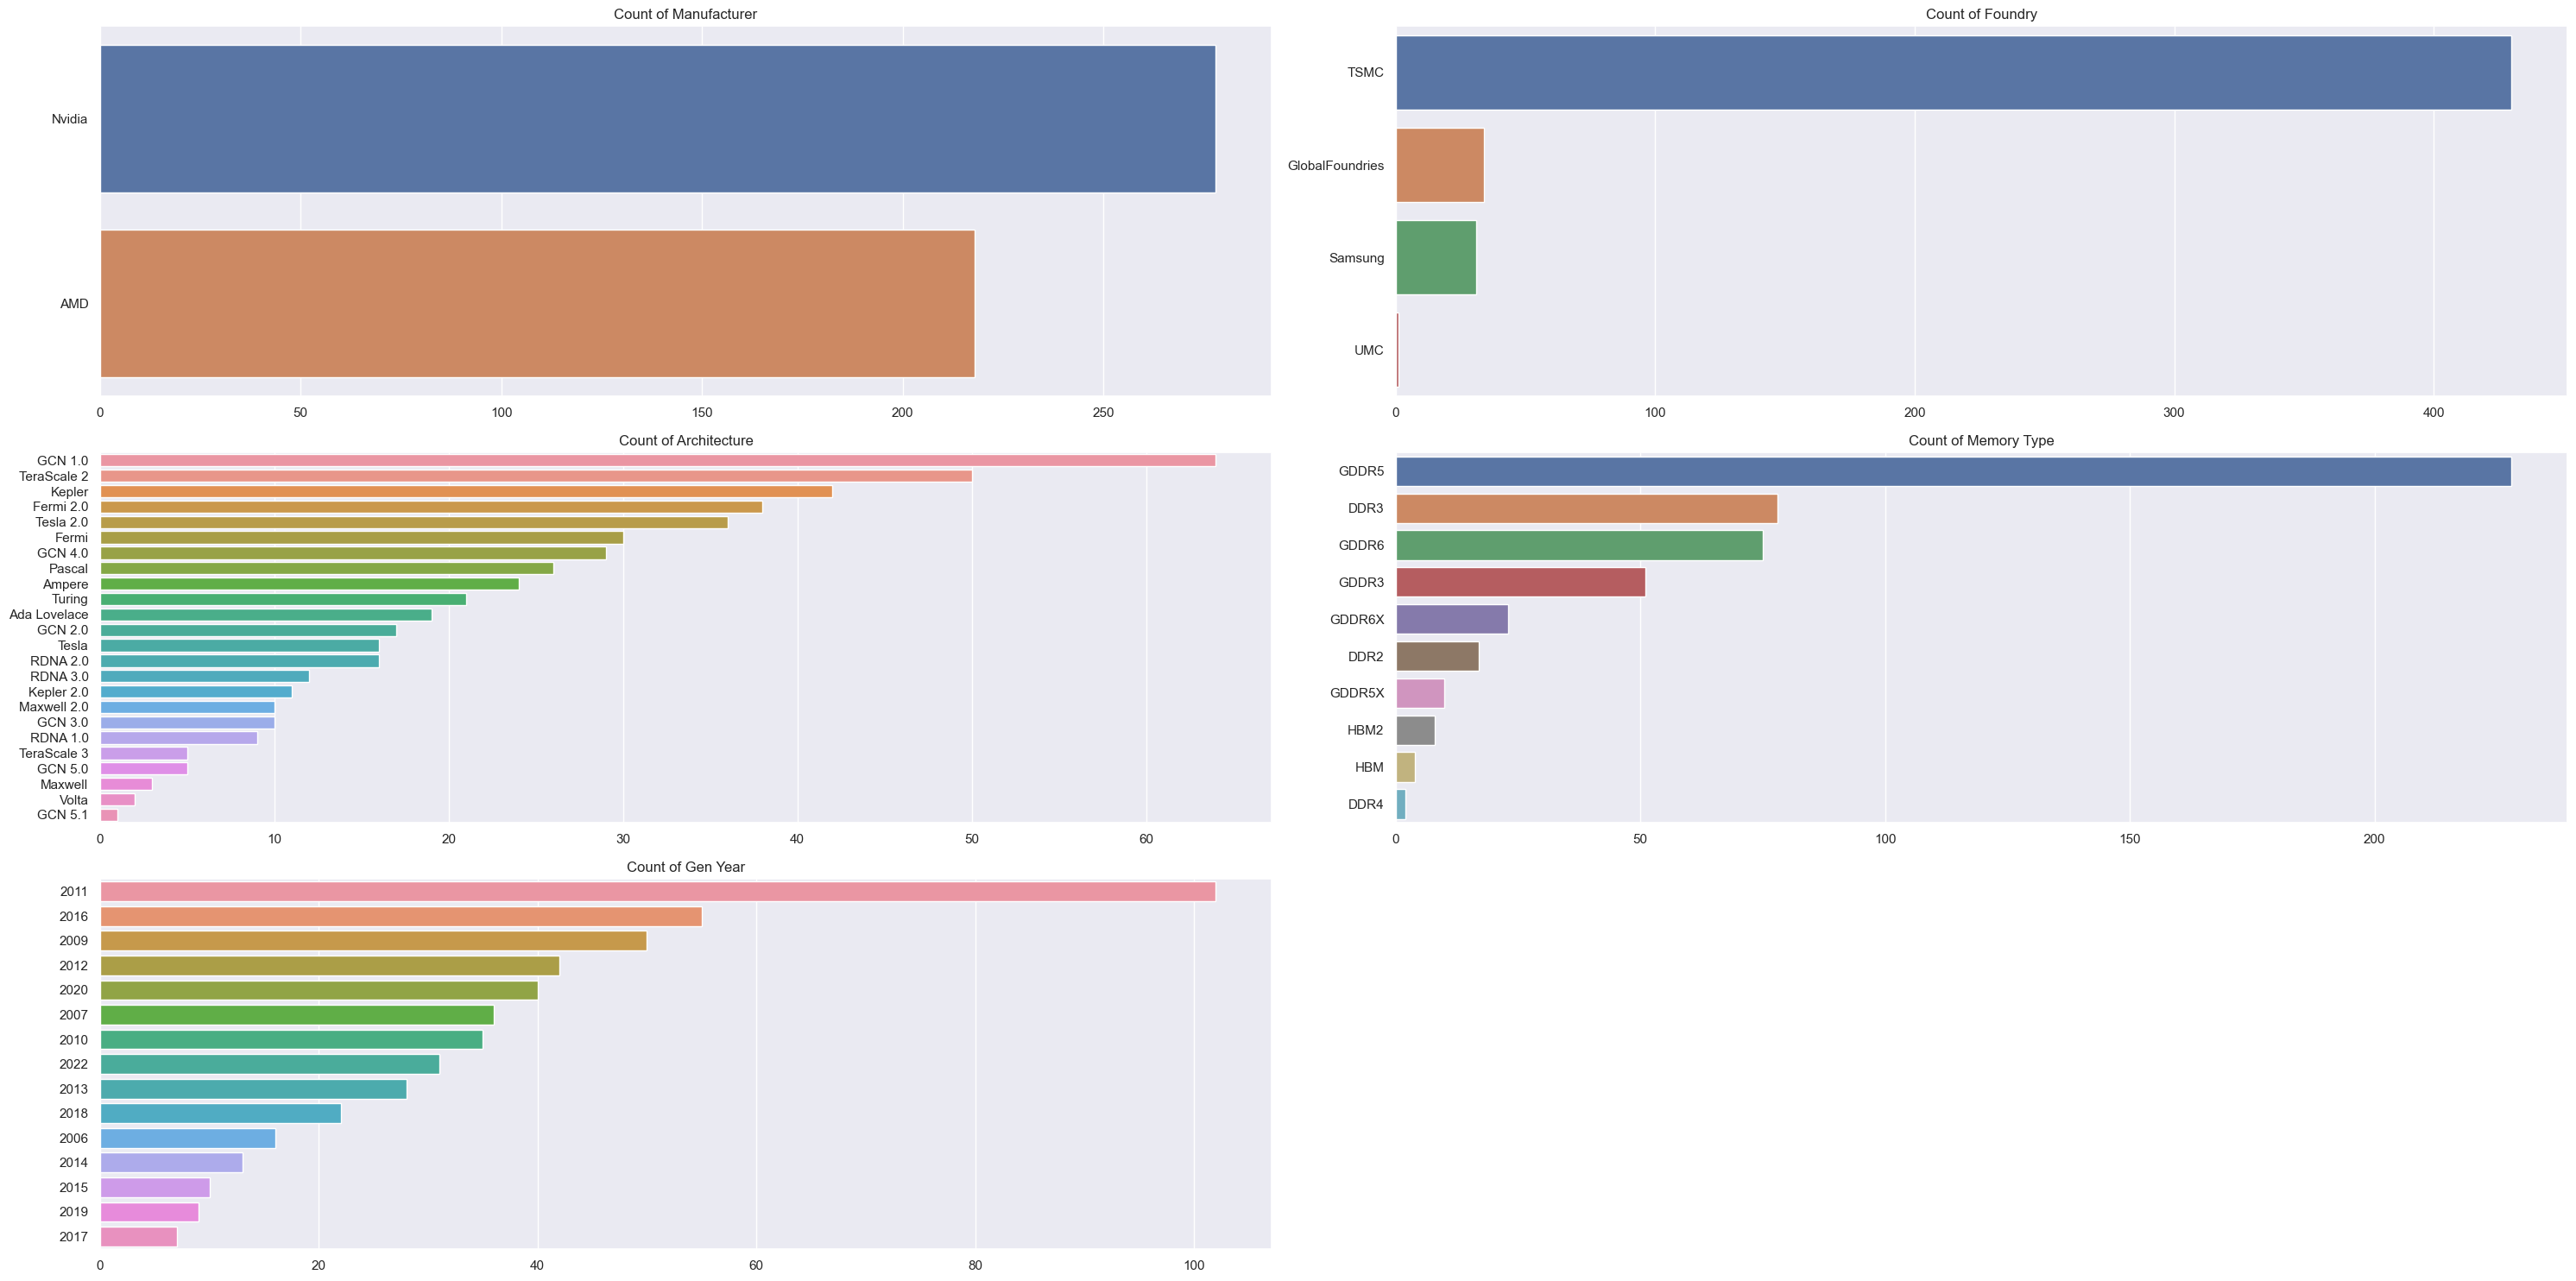

In [65]:
# Identify non-numerical (categorical) columns, including 'Gen Year'
categorical_cols = combined_data.select_dtypes(exclude='number').columns.tolist()
categorical_cols.append('Gen Year')  # Adding 'Gen Year' as it's a categorical representation of year

# Plot count plots for each categorical column
plt.figure(figsize=(30, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols) // 2 + 1, 2, i + 1)
    sb.countplot(y=combined_data[col], order = combined_data[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

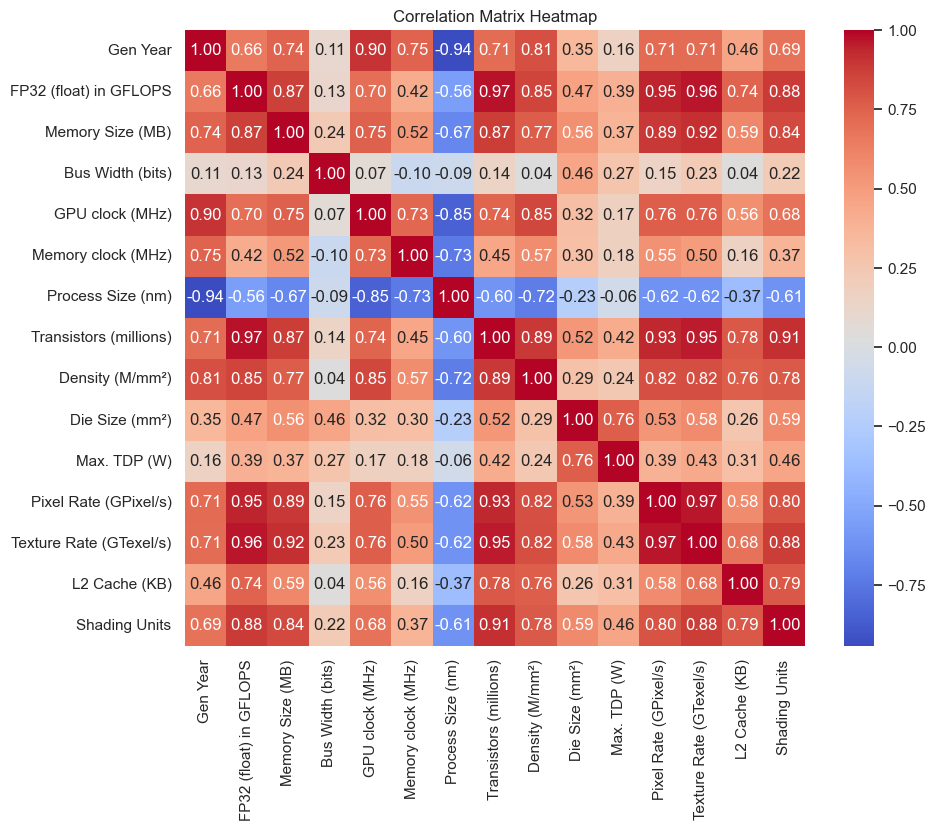

In [67]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sb.heatmap(combined_data.corr(numeric_only = True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()